# 

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('C:/Dane/2_ML_Projekty/003_programowanie_ML_zadanka_kurs_wprowadzenie/Moduł 3/Zbiory danych/data_csv.csv')

In [4]:
df.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [ ]:
# Sprawdzanie typu danych

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1768 non-null   object 
 1   SP500                 1768 non-null   float64
 2   Dividend              1767 non-null   float64
 3   Earnings              1764 non-null   float64
 4   Consumer Price Index  1768 non-null   float64
 5   Long Interest Rate    1768 non-null   float64
 6   Real Price            1768 non-null   float64
 7   Real Dividend         1767 non-null   float64
 8   Real Earnings         1764 non-null   float64
 9   PE10                  1648 non-null   float64
dtypes: float64(9), object(1)
memory usage: 138.3+ KB


In [ ]:
# data typu obj

In [8]:
df['Date'] =pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1768 non-null   datetime64[ns]
 1   SP500                 1768 non-null   float64       
 2   Dividend              1767 non-null   float64       
 3   Earnings              1764 non-null   float64       
 4   Consumer Price Index  1768 non-null   float64       
 5   Long Interest Rate    1768 non-null   float64       
 6   Real Price            1768 non-null   float64       
 7   Real Dividend         1767 non-null   float64       
 8   Real Earnings         1764 non-null   float64       
 9   PE10                  1648 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 138.3 KB


In [ ]:
# Data zmieniła format

In [ ]:
# 1.Wykres liniowy jak wartości SP500 zmienią się w czasie

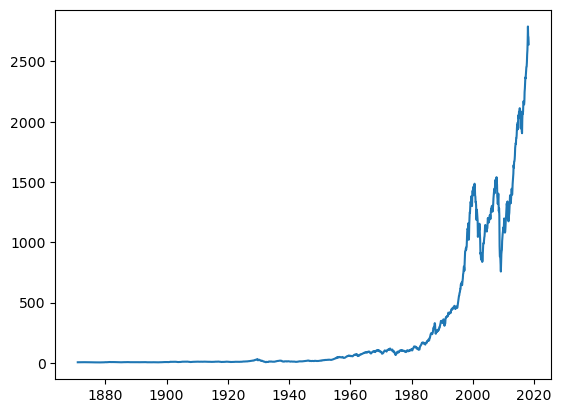

In [10]:
plt.plot(df['Date'], df['SP500'])
plt.show()

In [ ]:
# 2. Wykres słupkowy z danych treningowych biblioteki seaborn

In [21]:
import seaborn as sns

In [22]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# pierwszy argument to co na osi X czyli podgrupy do wyliczenia miary a drugi argument miara odpowiadająca poszczeólnym podgrupom

In [ ]:
# zliczamy liczbę klientów w dniu (day)

In [8]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [ ]:
# teraz wyciągamy etykiety za pomoca metody index

In [9]:
df['day'].value_counts().index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category', name='day')

In [ ]:
# To będa nasze dwie wartości..Y oraz X

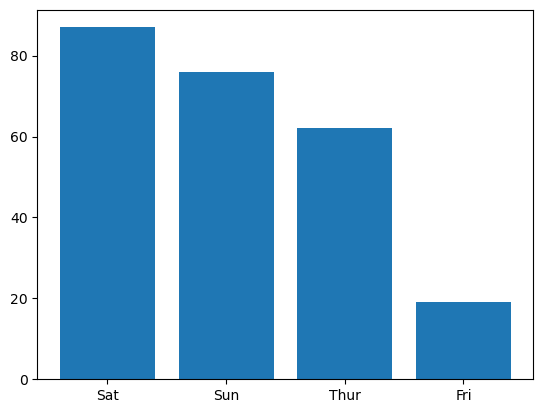

In [19]:
plt.bar(df['day'].value_counts().index, df['day'].value_counts())
plt.show()

In [ ]:
# Sprawdzamy jaki średni napiwek dają mężczyźni a jaki kobiety. grupujemy wyniki ze względu na płeć i wyliczy wartosć napiwku...

In [24]:
df.groupby('sex').agg({'tip':'mean'})

C:\Users\arcis\AppData\Local\Temp\ipykernel_2312\4053845762.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex').agg({'tip':'mean'})


,tip
sex,
Male,3.089618
Female,2.833448


In [25]:
df.groupby('sex', observed=False).agg({'tip': 'mean'})

,tip
sex,
Male,3.089618
Female,2.833448


In [26]:
df_aggr = df.groupby('sex', observed=False).agg({'tip': 'mean'})

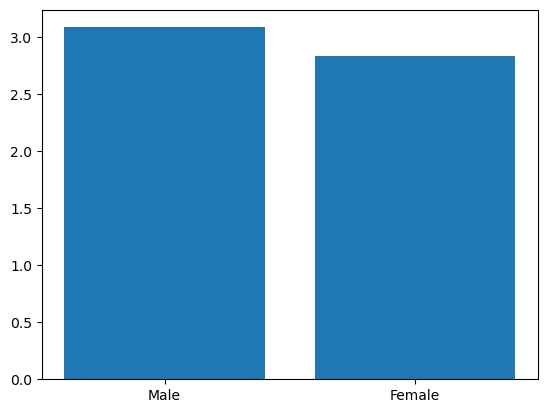

In [28]:
plt.bar(df_aggr.index, df_aggr['tip'])
plt.show()

In [ ]:
# Wykres rozrzutu robimy

In [ ]:
# Czy występuje zaleznosć między cąłkowitą wartością rachunku a zmienna tip czyli napiwkiem

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


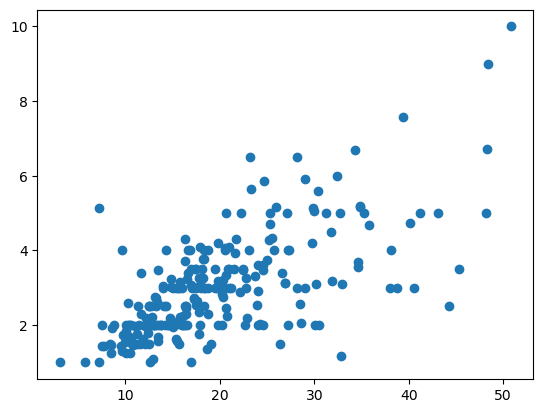

In [30]:
plt.scatter(df['total_bill'], df['tip'])
plt.show()

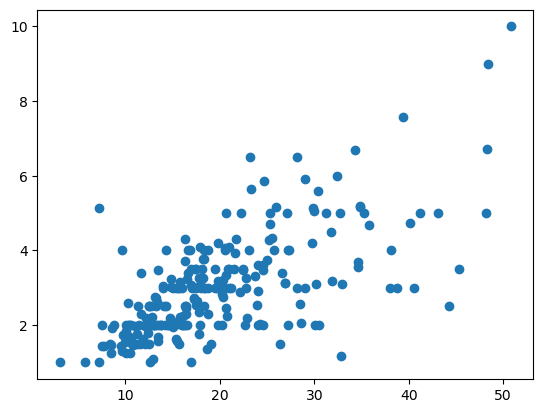

In [32]:
# inny zapis
plt.scatter('total_bill', 'tip', data=df)
plt.show()

In [ ]:
# Wykres kołowy
# jak często klienci odwiedzają retauracje w dane dni

In [33]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Wykres kołowy jeden argument mówiacy o wartościach można wykorzystac value_counts

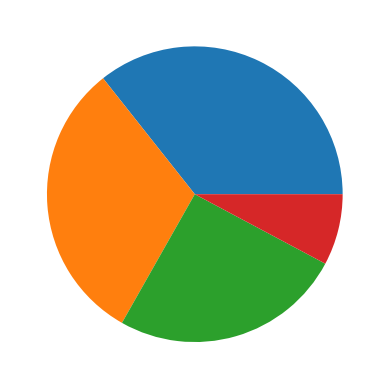

In [34]:
plt.pie(df['day'].value_counts())
plt.show()

In [ ]:
# aby widzieć etykiety trzeba dodać argument labels

In [ ]:
# etykiety ->df['day'].value_counts().index

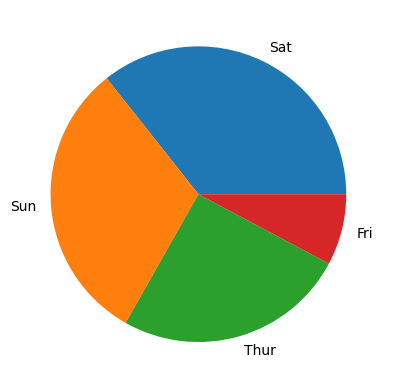

In [35]:
plt.pie(df['day'].value_counts(), labels=df['day'].value_counts().index)
plt.show()

In [ ]:
# dodanie wartości procentowych do wykresu autopct=dwa miejsca po przecinku f=float zmienna precinkowa autopct='%1.2f%%'

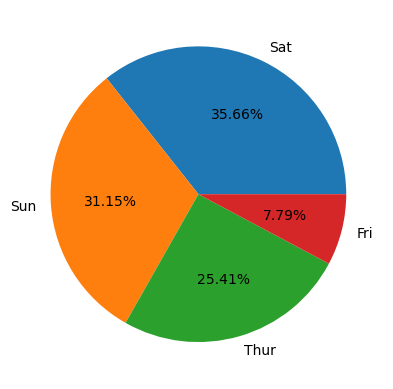

In [39]:
plt.pie(df['day'].value_counts(), labels=df['day'].value_counts().index, autopct='%1.2f%%')
plt.show()

In [ ]:
# Wykres pudełkowy rozkład zmiennej ilościowej..


In [ ]:
# Podajemy argument zmiennej do wizualizacji później pdoajemy nazwę zbioru danych

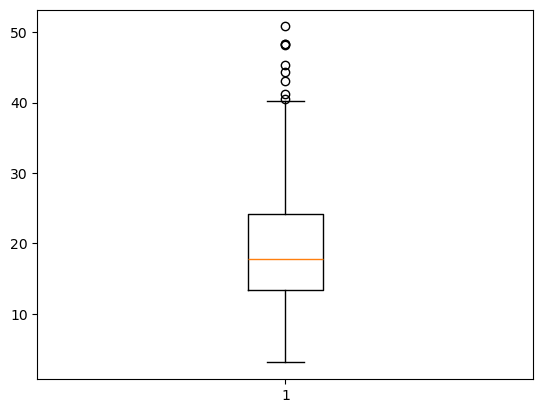

In [40]:
plt.boxplot('total_bill', data=df)
plt.show()

In [ ]:
# kreska oznacza wartośc drugiego kwartyla czyli medianę. Pudełko to rozkład 50% wartości od środka dół pierwszy kwarty a góra trzeci kwartyl

In [ ]:
# Kwartyl – jedna z miar położenia obserwacji.

    # pierwszy kwartyl (notacja: Q1) = dolny kwartyl = kwantyl rzędu 1/4 = 25% obserwacji jest położonych poniżej = 25. procent
    # drugi kwartyl (notacja: Q2) = mediana = kwantyl rzędu 1/2 = dzieli zbiór obserwacji na połowę = 50. procent
    # trzeci kwartyl (notacja: Q3) = górny kwartyl = kwantyl rzędu 3/4 = dzieli zbiór obserwacji na dwie części odpowiednio po 
    # 75% położonych poniżej tego kwartyla i 25% położonych powyżej = 75. procent. 
    # odległość między góra a dołem pudelka to rozstęp ćwiartkowy/między kwartylowy.

In [ ]:
# Górny "wąs" to trzeci kwartyl + 1,5 wartości rozstępu ćwiartkowego
# Dolny "wąś" to pierwszy kwartyl - 1,5 wartości rozstępu ćwiartkowego

In [ ]:
# Punkty powyżej górnego wąsa to wartości odstające powyżej trzeciego kwartyla plus 1.5 wartości rozstępu ćwiartkowego.
# Jak sa punkty poniżej to poniżej pierwszego kwartyla - 1.5 wartości rozstępu ćwiartkowego

In [ ]:
# matplot lib edycja wykresu

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df =pd.read_excel('C:/Dane/2_ML_Projekty/003_programowanie_ML_zadanka_kurs_wprowadzenie/Moduł 3/Zbiory danych/firma.xlsx')

In [5]:
df.head()

,Data,Koszty,Przychody,Wynik finansowy,Współpraca,Liczba pracowników
0,2014-01,300,548,248,TAK,10
1,2014-02,321,526,205,TAK,18
2,2014-03,320,512,192,TAK,15
3,2014-04,378,525,147,TAK,14
4,2014-05,373,502,129,TAK,16


In [ ]:
# Sprawdzamy dane

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data                24 non-null     object
 1   Koszty              24 non-null     int64 
 2   Przychody           24 non-null     int64 
 3   Wynik finansowy     24 non-null     int64 
 4   Współpraca          24 non-null     object
 5   Liczba pracowników  24 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ KB


In [ ]:
# zmieniamy dane z object na datetime64

In [7]:
df['Data'] = pd.to_datetime(df['Data'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                24 non-null     datetime64[ns]
 1   Koszty              24 non-null     int64         
 2   Przychody           24 non-null     int64         
 3   Wynik finansowy     24 non-null     int64         
 4   Współpraca          24 non-null     object        
 5   Liczba pracowników  24 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.3+ KB


In [ ]:
# wykres na osi x data oś y wynik finansowy firmy



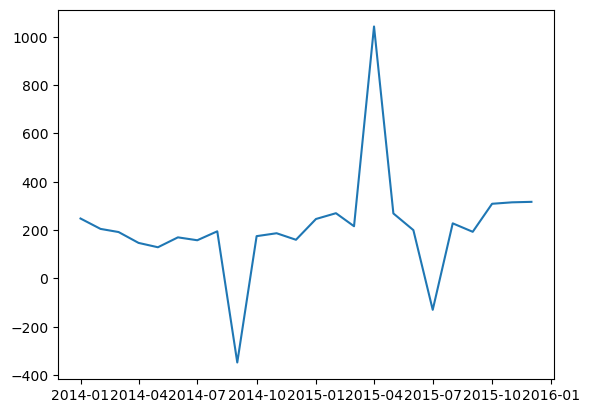

In [9]:
plt.plot('Data', 'Wynik finansowy',data=df)
plt.show()

In [ ]:
# Przypisanie danych do osi

In [12]:
x = df['Data']
y = df['Wynik finansowy']

In [ ]:
# Tytuł wykresu

Text(0.5, 1.0, 'Wynik finansowy rpzedsiebiorstwa')

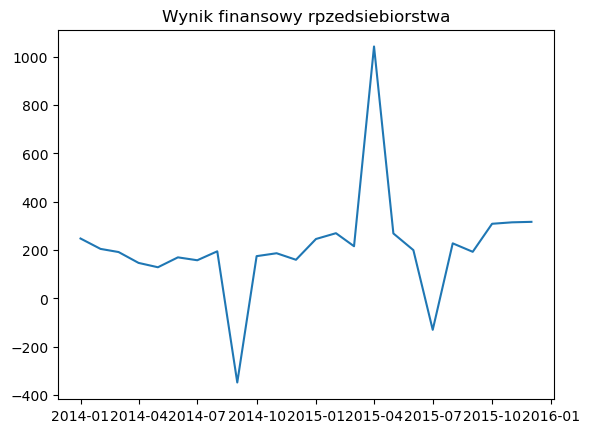

In [13]:
plt.plot(x,y)
plt.title('Wynik finansowy rpzedsiebiorstwa')

In [ ]:
# Nazwy osi

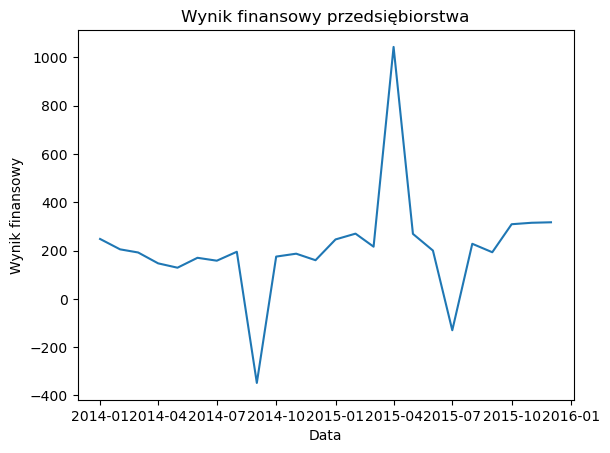

In [17]:
plt.plot(x,y)
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.title("Wynik finansowy przedsiębiorstwa")
plt.show()

In [ ]:
# Kilka wykresów w jednym układzie współrzędnych oś x zostaje oś y dodajemy

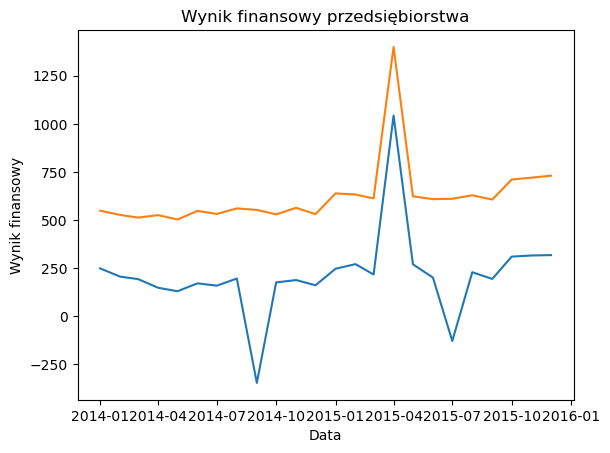

In [18]:
plt.plot(x,y)
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'])
plt.title("Wynik finansowy przedsiębiorstwa")
plt.show()

In [ ]:
# Legenda plt legend(['pierwsze dane od góry na osi y', 'kolejne dane na osi y']) kolejność od góry danych zgodnie z powstawianiem wykresów

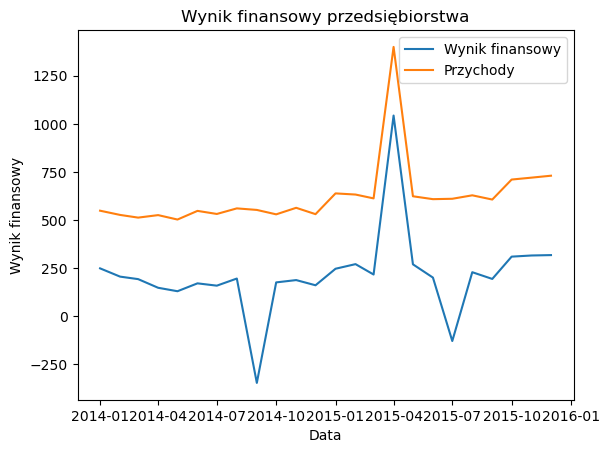

In [19]:
plt.plot(x,y)
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'])
plt.title("Wynik finansowy przedsiębiorstwa")
plt.legend(['Wynik finansowy', 'Przychody'])
plt.show()

In [ ]:
# Przesuniecie legendy

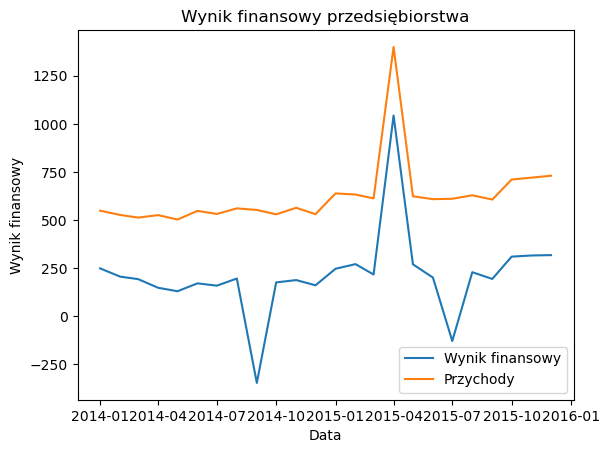

In [14]:
plt.plot(x,y)
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'])
plt.title("Wynik finansowy przedsiębiorstwa")
plt.legend(['Wynik finansowy', 'Przychody'], loc=4)
plt.show()

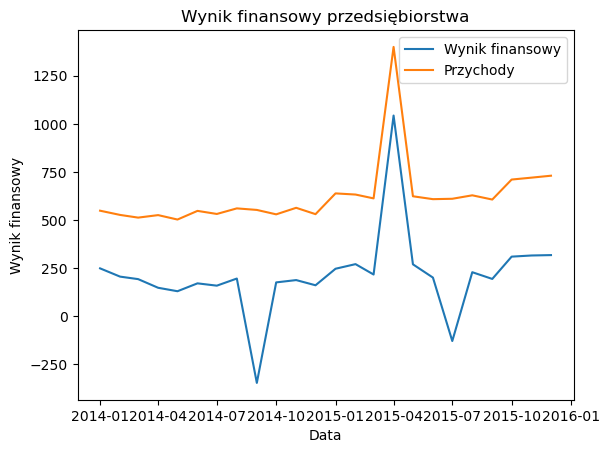

In [14]:
plt.plot(x,y)
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'])
plt.title("Wynik finansowy przedsiębiorstwa")
plt.legend(['Wynik finansowy', 'Przychody'], loc=1)
plt.show()

In [ ]:
# Legenda drugi sposób


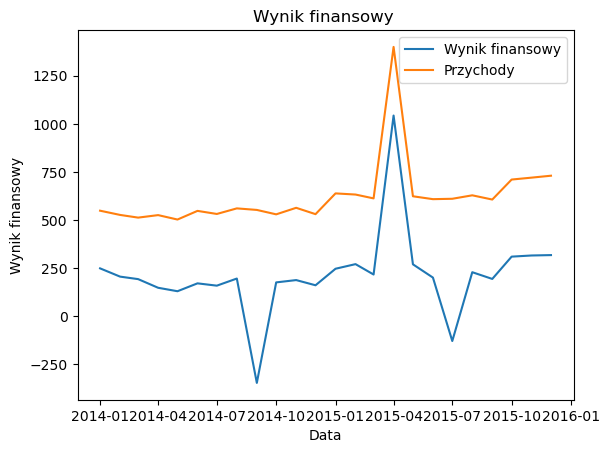

In [16]:
plt.plot(x,y, label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], label='Przychody')
plt.title("Wynik finansowy ")
plt.legend()
plt.show()

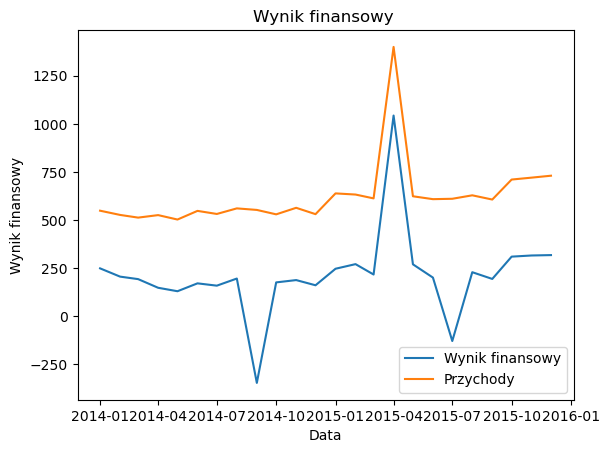

In [15]:
plt.plot(x,y, label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.show()

In [ ]:
# Markery znaczniki na wykresie przecięcia z osiami x oraz y marker

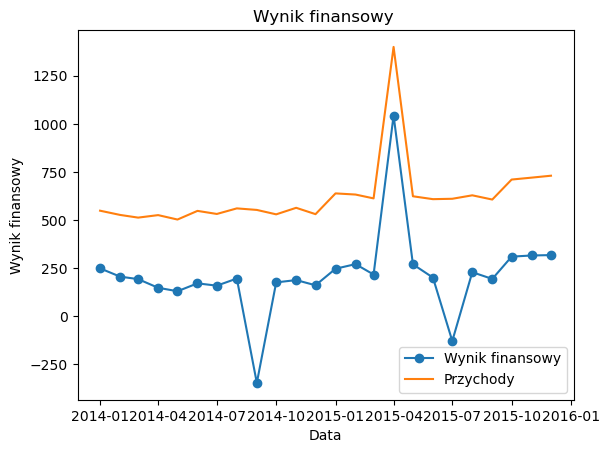

In [18]:
plt.plot(x,y, marker="o", label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.show()

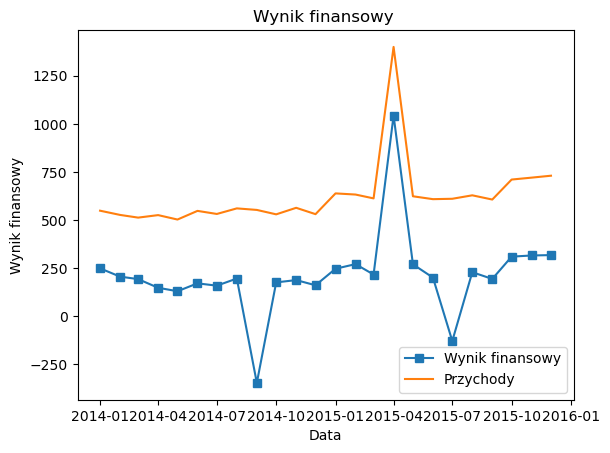

In [23]:
plt.plot(x,y, marker="s", label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.show()

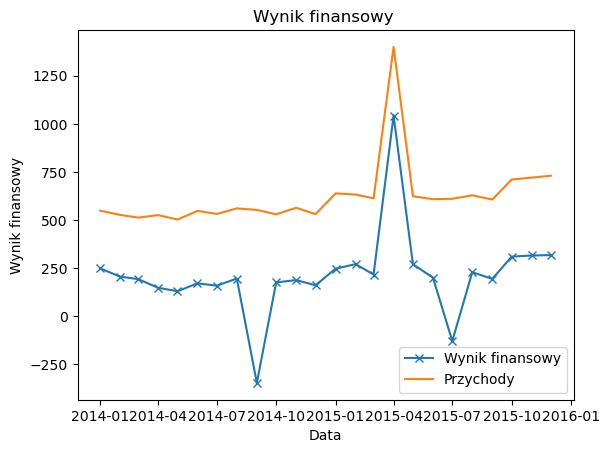

In [24]:
plt.plot(x,y, marker="x", label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.show()

In [ ]:
# Kolor linii zmiana koloru

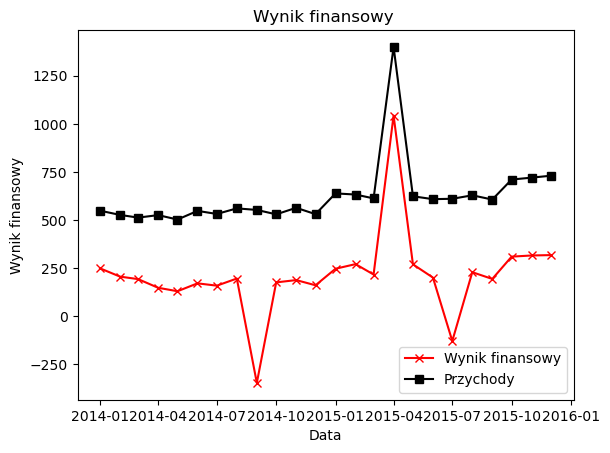

In [26]:
plt.plot(x,y, marker="x", color='red', label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], marker='s', color ='black', label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.show()

In [ ]:
# Zmiana stylu linii styl kreska kropka

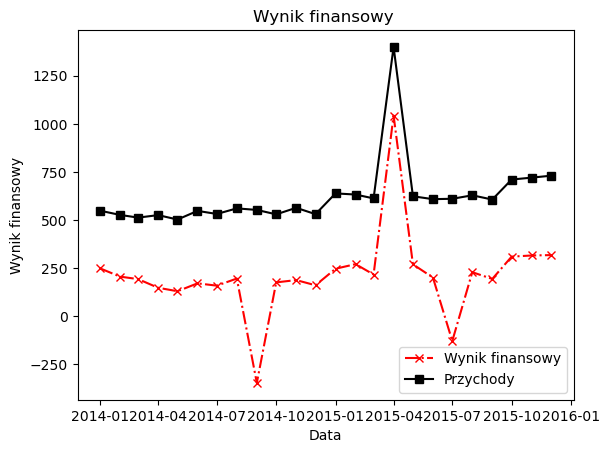

In [27]:
plt.plot(x,y, marker="x", color='red', linestyle="-.", label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], marker='s', color ='black', label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.show()

In [6]:
plt.plot(x,y, marker="x", color='red', linestyle="-.", label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], marker='s', color ='black', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.show()

NameError: name 'x' is not defined

In [ ]:
# plt.plot(x,y, marker="x", color='red', linestyle="-.", label='Wynik finansowy')
# plt.xlabel('Data')
# plt.ylabel('Wynik finansowy')
# plt.plot(x, df['Przychody'], marker='s', color ='black', linestyle="-", label='Przychody')
# plt.title("Wynik finansowy ")
# plt.legend(loc=4)
# plt.show()

In [ ]:
# plt.plot(x,y, marker="x", color='red', linestyle="-.", label='Wynik finansowy') to można zastąpić


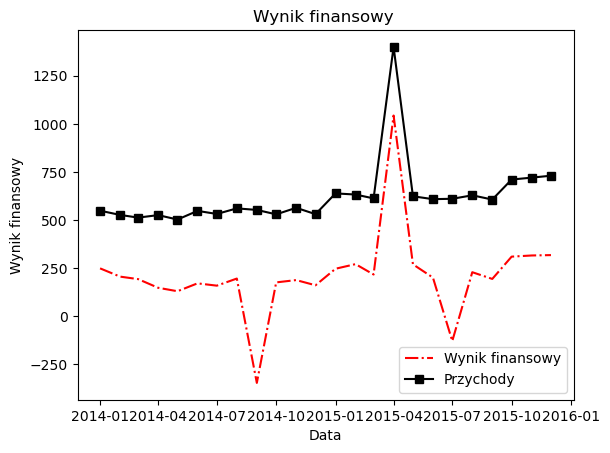

In [31]:
plt.plot(x,y,'r-.', label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], marker='s', color ='black', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.show()

In [ ]:
# color -r polaczenie z typem linii .-

In [ ]:
# grubośc linii

In [10]:
plt.plot(x,y, marker="x", color='red', linestyle="-.", linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], marker='s', color ='black', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.show()

NameError: name 'x' is not defined

In [ ]:
# Dodanie siatki w tle wykresu



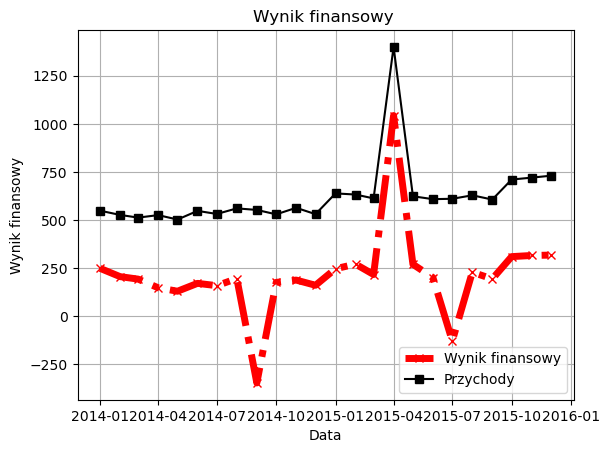

In [33]:
plt.plot(x,y, marker="x", color='red', linestyle="-.", linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], marker='s', color ='black', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.grid()
plt.show()

In [ ]:
# Zmiana wartości na osiach wspołrzędnych na lepsze niż te z automatu co sa na wykresie xticks ytics

In [ ]:
# bibilteki

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# pobranie danych

In [22]:
df =pd.read_excel('C:/Dane/2_ML_Projekty/003_programowanie_ML_zadanka_kurs_wprowadzenie/Moduł 3/Zbiory danych/firma.xlsx')

In [ ]:
# weryfikacja

In [23]:
df.head()


,Data,Koszty,Przychody,Wynik finansowy,Współpraca,Liczba pracowników
0,2014-01,300,548,248,TAK,10
1,2014-02,321,526,205,TAK,18
2,2014-03,320,512,192,TAK,15
3,2014-04,378,525,147,TAK,14
4,2014-05,373,502,129,TAK,16


In [ ]:
# weryfikacja typu danych

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data                24 non-null     object
 1   Koszty              24 non-null     int64 
 2   Przychody           24 non-null     int64 
 3   Wynik finansowy     24 non-null     int64 
 4   Współpraca          24 non-null     object
 5   Liczba pracowników  24 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ KB


In [ ]:
# zmieniamy dane z object na datetime64

In [25]:
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
# ponowna weryfikacja

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                24 non-null     datetime64[ns]
 1   Koszty              24 non-null     int64         
 2   Przychody           24 non-null     int64         
 3   Wynik finansowy     24 non-null     int64         
 4   Współpraca          24 non-null     object        
 5   Liczba pracowników  24 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.3+ KB


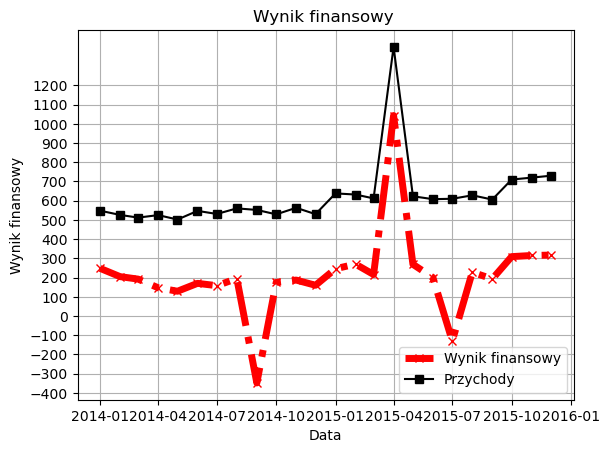

In [27]:
plt.plot(x,y, marker="x", color='red', linestyle="-.", linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.ylabel('Wynik finansowy')
plt.plot(x, df['Przychody'], marker='s', color ='black', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.grid()
plt.show()

In [ ]:
# na osi X mamy datę wiec cięzko zmienić podziałkę tworzymy nowa kolumne zapisujaca date na format tekstowy

In [43]:
df['Data-str'] = df['Data'].apply(lambda x: x.strftime("%Y-%m"))

In [ ]:
# sprawdzamy heads

In [31]:
df.head()

,Data,Koszty,Przychody,Wynik finansowy,Współpraca,Liczba pracowników,Data-str
0,2014-01-01,300,548,248,TAK,10,2014-01
1,2014-02-01,321,526,205,TAK,18,2014-02
2,2014-03-01,320,512,192,TAK,15,2014-03
3,2014-04-01,378,525,147,TAK,14,2014-04
4,2014-05-01,373,502,129,TAK,16,2014-05


In [ ]:
plt.plot(df['Data-str'],y, marker="x", color='red', linestyle="-.", linewidth=5,label='Wynik finansowy')
# zmiana tu df['Data-str']
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xtics(['2014-01','2014-06', '2014-12', '2015-01','2015-06', '2015-12','2015-01'])
# zmiana tu i dodanie danych na osi x
plt.ylabel('Wynik finansowy')
plt.plot(df['Data-str'], df['Przychody'], marker='s', color ='black', linestyle="-", label='Przychody')
# zmiana tu df['Data-str']
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.grid()
plt.show()

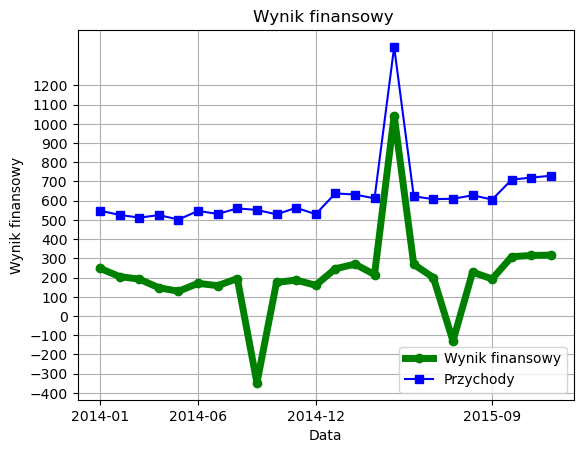

In [49]:
plt.plot(df['Data-str'],y,'g-o', linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'])
plt.ylabel('Wynik finansowy')
plt.plot(df['Data-str'], df['Przychody'], marker='s', color ='blue', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.grid()
plt.show()

In [ ]:
# Rotacja etykiet np 90 stopni

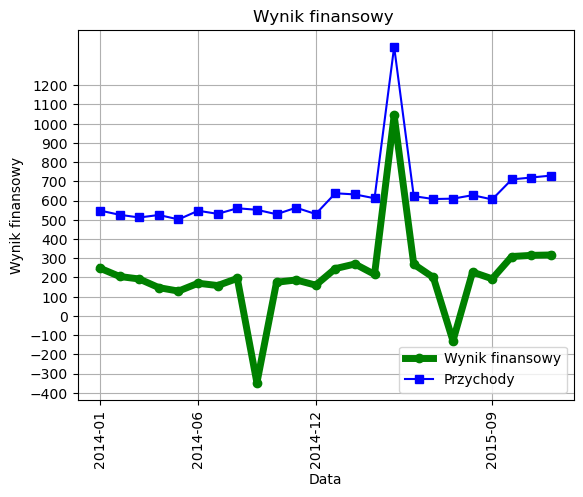

In [50]:
plt.plot(df['Data-str'],y,'g-o', linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
plt.plot(df['Data-str'], df['Przychody'], marker='s', color ='blue', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.legend(loc=4)
plt.grid()
plt.show()

In [ ]:
# Dodanie tekstu do wykresu z definiowaniem jego połozenia na osiach układu wsp. plt.text('wsp osi x', 'wsp osi y','tekst')

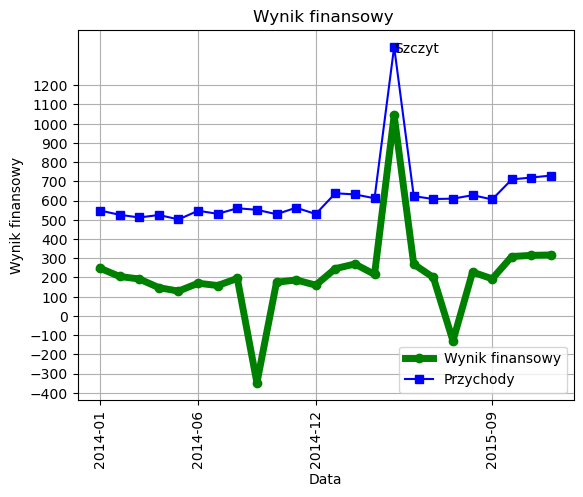

In [52]:
plt.plot(df['Data-str'],y,'g-o', linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
plt.plot(df['Data-str'], df['Przychody'], marker='s', color ='blue', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.text('2015-04', 1370, 'Szczyt')
plt.legend(loc=4)
plt.grid()
plt.show()

In [ ]:
# zmiana koloru czcionki na pomarańczowy


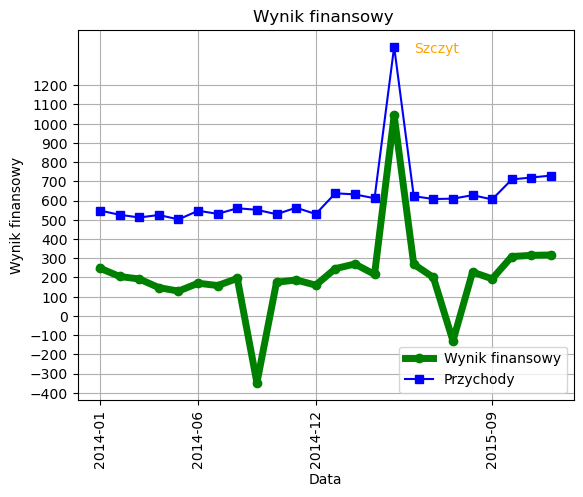

In [54]:
plt.plot(df['Data-str'],y,'g-o', linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
plt.plot(df['Data-str'], df['Przychody'], marker='s', color ='blue', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.text('2015-05', 1370, 'Szczyt',color='orange')
plt.legend(loc=4)
plt.grid()
plt.show()

In [ ]:
# zmiana rozmiaruczacionki tekstu na wykresie

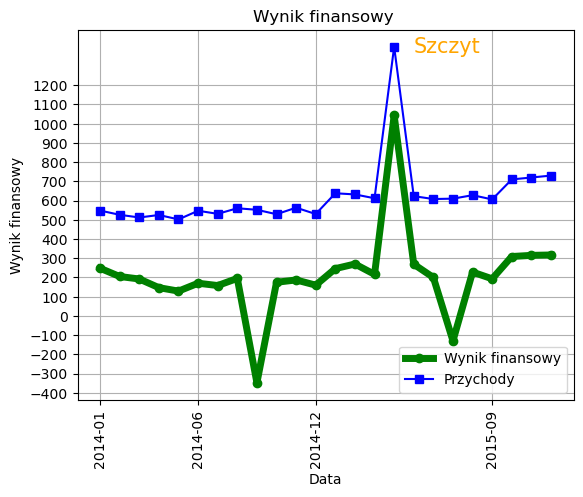

In [55]:
plt.plot(df['Data-str'],y,'g-o', linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
plt.plot(df['Data-str'], df['Przychody'], marker='s', color ='blue', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.text('2015-05', 1370, 'Szczyt',color='orange', size =15)
plt.legend(loc=4)
plt.grid()
plt.show()

In [ ]:
# Edycja styli wykresów plt.style.available w matplotlib

In [56]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
# wybieramy styl z listy a poniżej wklejamy wykresktóry chcemy narysować:

In [57]:
plt.style.use('ggplot')

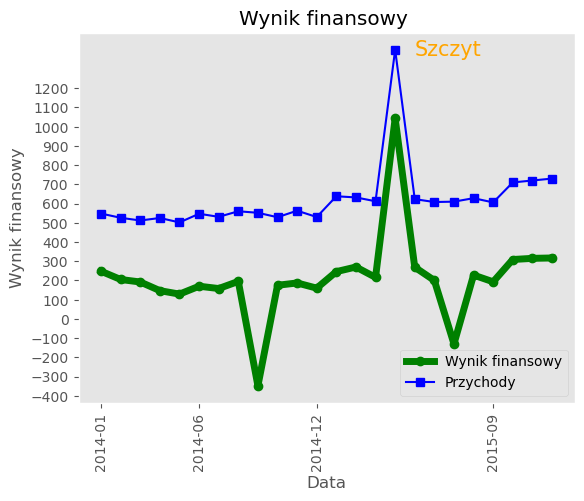

In [58]:
plt.plot(df['Data-str'],y,'g-o', linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
plt.plot(df['Data-str'], df['Przychody'], marker='s', color ='blue', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.text('2015-05', 1370, 'Szczyt',color='orange', size =15)
plt.legend(loc=4)
plt.grid()
plt.show()

In [ ]:
plt.plot(df['Data-str'],y,'g-o', linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
plt.plot(df['Data-str'], df['Przychody'], marker='s', color ='blue', linestyle="-", label='Przychody')
plt.title("Wynik finansowy ")
plt.text('2015-05', 1370, 'Szczyt',color='orange', size =15)
plt.legend(loc=4)
plt.grid()
plt.show()

In [ ]:
# # usuniemy informacje o stylu i linii
plt.plot(df['Data-str'],y, linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
# usuwamy:marker='s', color ='blue', linestyle="-"
plt.plot(df['Data-str'], df['Przychody'] , label='Przychody')
plt.title("Wynik finansowy ")
plt.text('2015-05', 1370, 'Szczyt',color='orange', size =15)
# plt.legend(loc=4)
# plt.grid()
plt.show()




In [59]:
plt.style.use('ggplot')

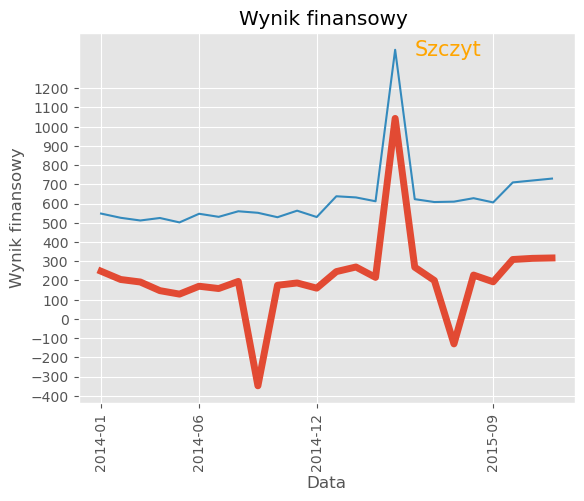

In [60]:
# # usuniemy informacje o stylu i linii
plt.plot(df['Data-str'],y, linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
# usuwamy:marker='s', color ='blue', linestyle="-"
plt.plot(df['Data-str'], df['Przychody'] , label='Przychody')
plt.title("Wynik finansowy ")
plt.text('2015-05', 1370, 'Szczyt',color='orange', size =15)
# plt.legend(loc=4)
# plt.grid()
plt.show()

In [ ]:
# styl ma zdefiniowane swoje kolory jeśli się ich nei zdefiniuje to ulegną zmianie.

In [61]:
plt.style.use('seaborn-v0_8-dark-palette')

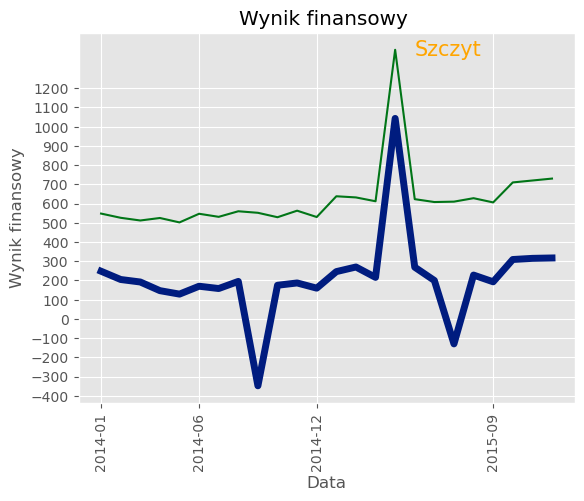

In [62]:
# # usuniemy informacje o stylu i linii
plt.plot(df['Data-str'],y, linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
# usuwamy:marker='s', color ='blue', linestyle="-"
plt.plot(df['Data-str'], df['Przychody'] , label='Przychody')
plt.title("Wynik finansowy ")
plt.text('2015-05', 1370, 'Szczyt',color='orange', size =15)
# plt.legend(loc=4)
# plt.grid()
plt.show()

In [ ]:
# styl kreskowkowy plt.xkcd()

In [64]:
plt.xkcd()

In [ ]:
# powstaje obiekt który wywołujemy

In [ ]:
# wklejamy wykres

In [ ]:
# kasowanie stylu

In [77]:
plt.rcdefaults()
%matplotlib inline

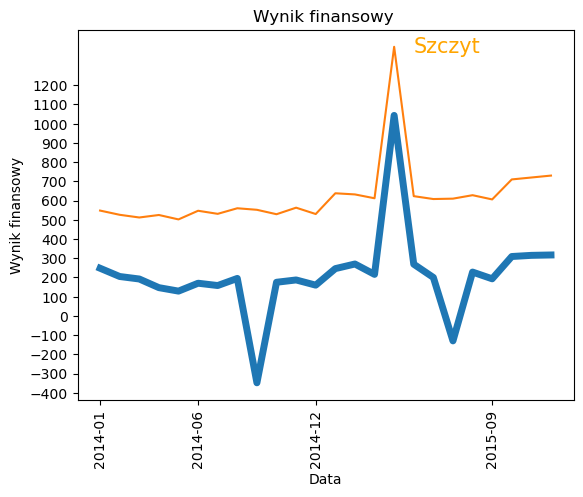

In [78]:
# # usuniemy informacje o stylu i linii
plt.plot(df['Data-str'],y, linewidth=5,label='Wynik finansowy')
plt.xlabel('Data')
plt.yticks([-400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.xticks(['2014-01','2014-06', '2014-12', '2015-09'],rotation=90)
plt.ylabel('Wynik finansowy')
# usuwamy:marker='s', color ='blue', linestyle="-"
plt.plot(df['Data-str'], df['Przychody'] , label='Przychody')
plt.title("Wynik finansowy ")
plt.text('2015-05', 1370, 'Szczyt',color='orange', size =15)
# plt.legend(loc=4)
# plt.grid()
plt.show()

In [ ]:
# Matplotlib obiektowe podejscie

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df =pd.read_csv('C:/Dane/2_ML_Projekty/003_programowanie_ML_zadanka_kurs_wprowadzenie/Moduł 3/Zbiory danych/data_csv.csv')

In [3]:
df.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1768 non-null   object 
 1   SP500                 1768 non-null   float64
 2   Dividend              1767 non-null   float64
 3   Earnings              1764 non-null   float64
 4   Consumer Price Index  1768 non-null   float64
 5   Long Interest Rate    1768 non-null   float64
 6   Real Price            1768 non-null   float64
 7   Real Dividend         1767 non-null   float64
 8   Real Earnings         1764 non-null   float64
 9   PE10                  1648 non-null   float64
dtypes: float64(9), object(1)
memory usage: 138.3+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1768 non-null   datetime64[ns]
 1   SP500                 1768 non-null   float64       
 2   Dividend              1767 non-null   float64       
 3   Earnings              1764 non-null   float64       
 4   Consumer Price Index  1768 non-null   float64       
 5   Long Interest Rate    1768 non-null   float64       
 6   Real Price            1768 non-null   float64       
 7   Real Dividend         1767 non-null   float64       
 8   Real Earnings         1764 non-null   float64       
 9   PE10                  1648 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 138.3 KB


In [ ]:
# Przypisanie zmiennych

In [7]:
x = df['Date']
y = df['SP500']

In [ ]:
# Wiele wykresow rozmiar fig-size wykresu

In [8]:
fig =plt.figure(figsize=(15, 7))

<Figure size 1500x700 with 0 Axes>

In [ ]:
# <Figure size 1500x700 with 0 Axes> Dostaliśmy wykres ale ma zero axes czyli zero przestrzeni do rysowania wykresów

In [ ]:
# tworzymy pierwszy wykres funkcją add)axes 4 argumenty dwa pierwsze to odlegosć od lewej strony od góry i ołu przestrzeni axes
# a dwa kolejne mówią jak szeroki i wysoki ma być wykres

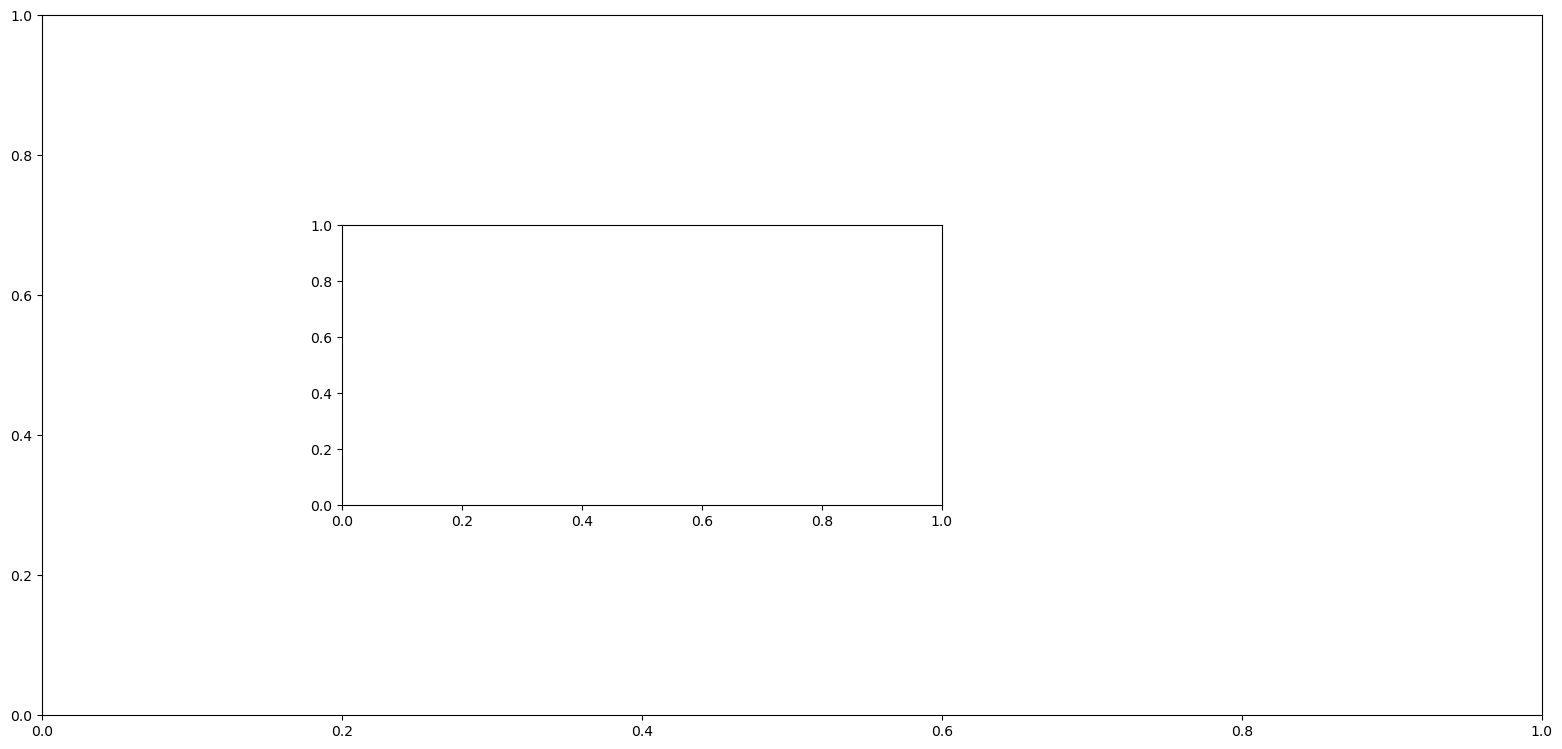

In [18]:
fig =plt.figure(figsize=(15, 7))
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.2, 0.3, 0.4, 0.4])

In [ ]:
#  mamy już drugą przestrzeń pod wykres

In [ ]:
# drugi wykres oddalony od lewe strony o 0.2 na osi x i 0.3 na osi ydługośc na osi x i y to 0.4

In [ ]:
# jak chcemy aby wykres powstał na wykresie nr1 to musi być przedrostek ax1

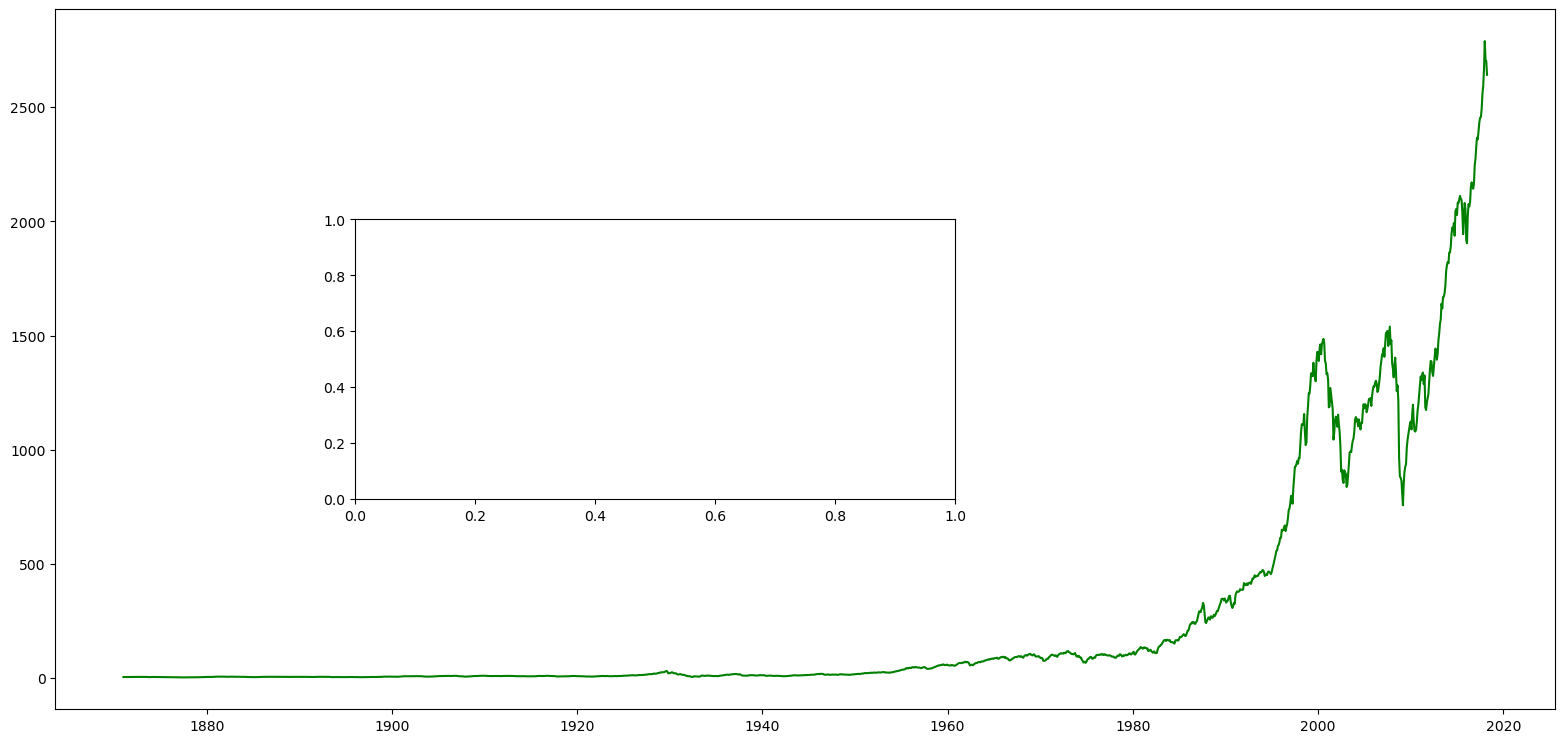

In [19]:
fig =plt.figure(figsize=(15, 7))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.plot(x,y, 'g-')
ax2 = fig.add_axes([0.2, 0.3, 0.4, 0.4])

In [ ]:
# drugi wykres

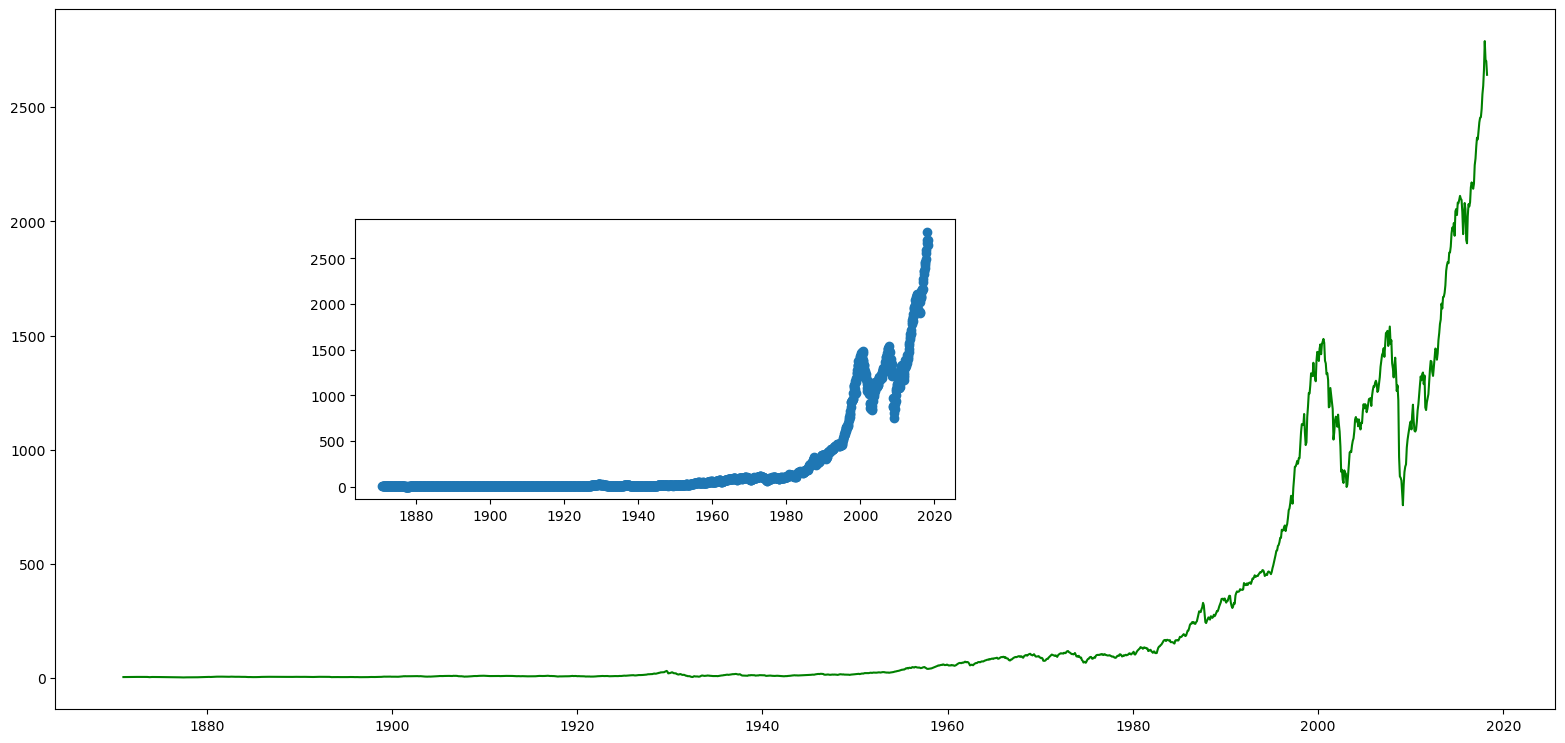

In [20]:
fig =plt.figure(figsize=(15, 7))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.plot(x,y, 'g-')
ax2 = fig.add_axes([0.2, 0.3, 0.4, 0.4])
ax2.scatter(x,y)

In [ ]:
# Sposób obiektowy pozwala na pełną elastyczność tworzenia wykresów

In [ ]:
# Rozwiązanie nr 2 tablica wykresów/siatka wykresów


In [ ]:
# 1.Tworzymy pola figures i axes wykorzystanie subplot 2x2 siatka

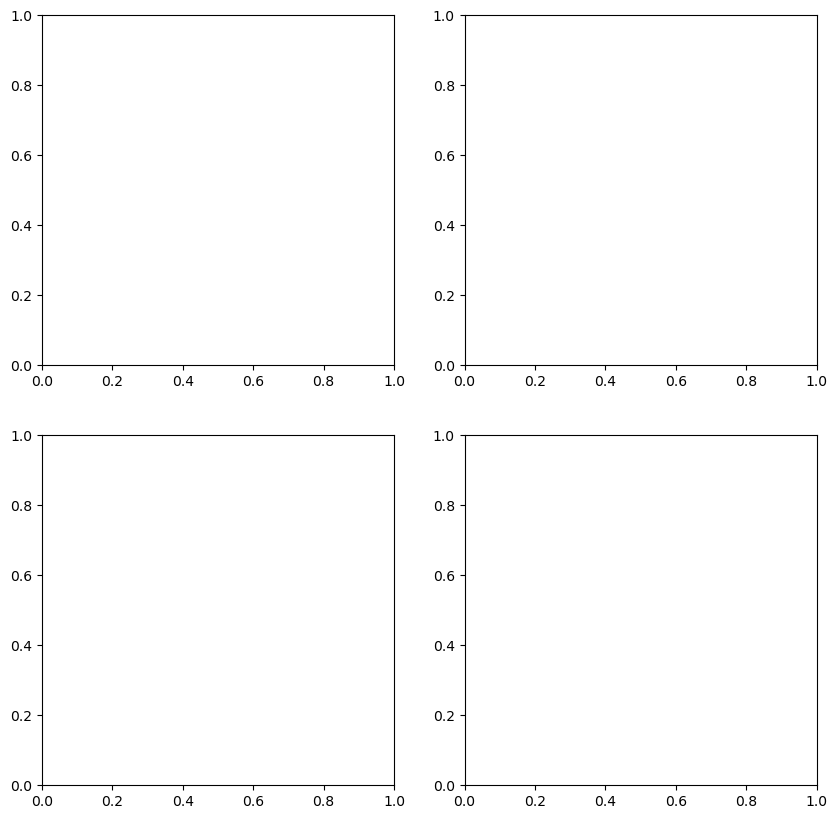

In [21]:
figure,axes =plt.subplots(2 ,2, figsize=(10,10))

In [ ]:
# odnosimy się do wykresu rpzez axes[0,0]


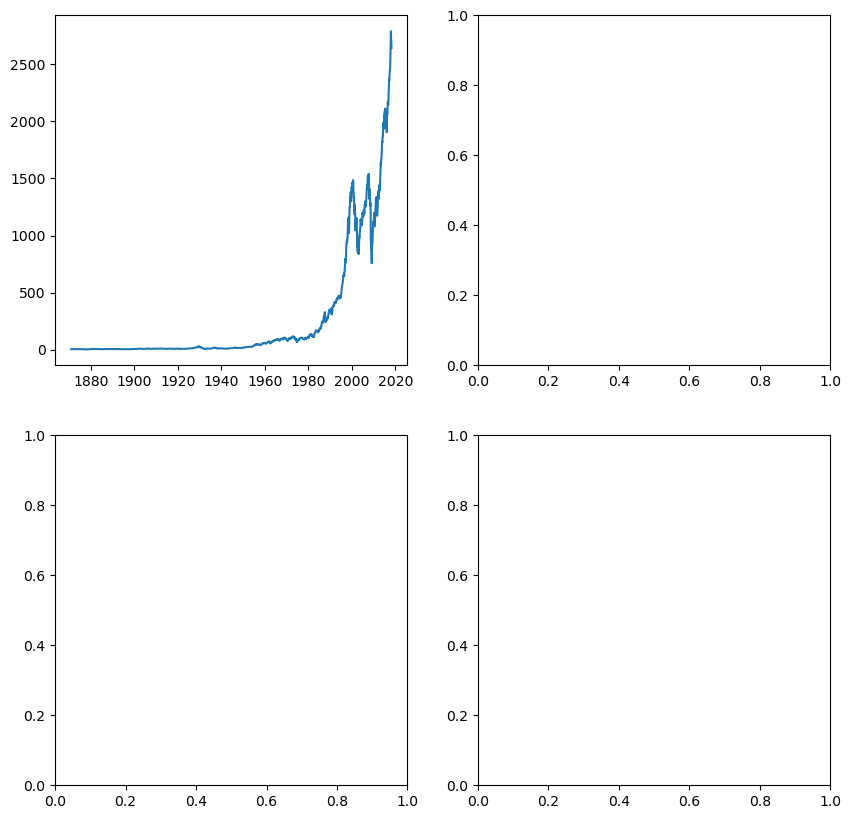

In [22]:
figure,axes =plt.subplots(2 ,2, figsize=(10,10))
axes[0,0].plot(x,y)

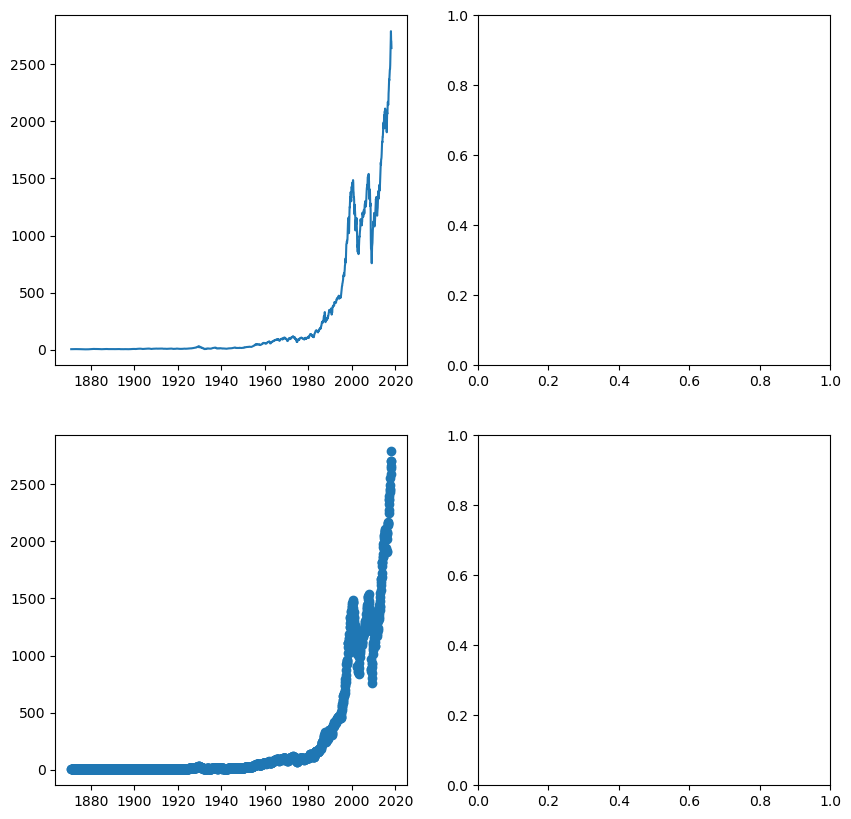

In [23]:
figure,axes =plt.subplots(2 ,2, figsize=(10,10))
axes[0,0].plot(x,y)
axes[1,0].scatter(x,y)

<BarContainer object of 1768 artists>

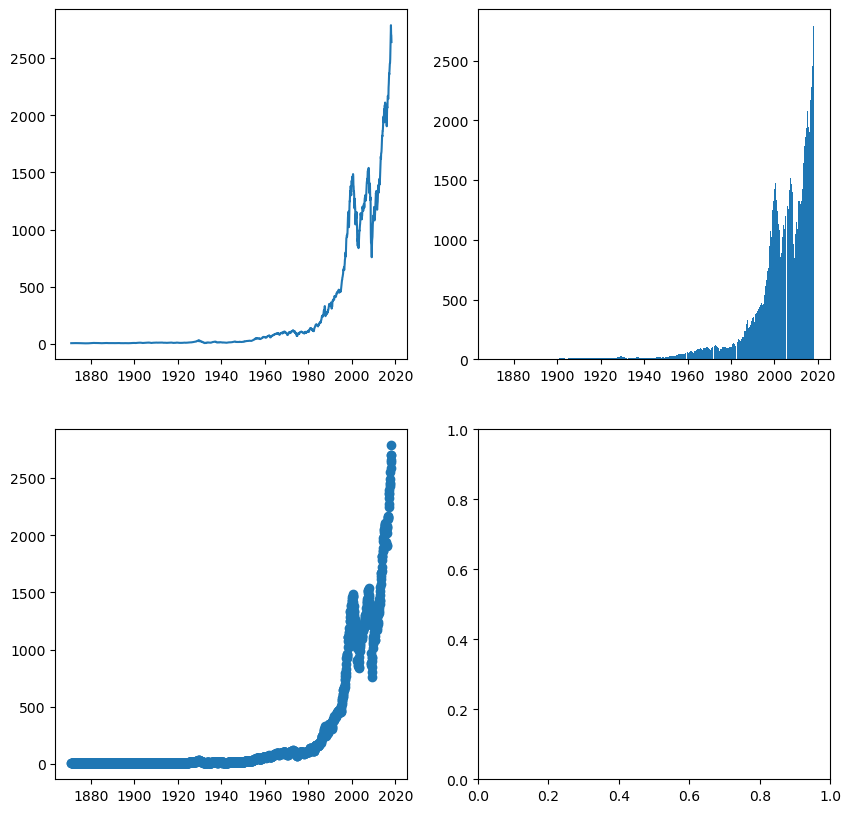

In [25]:
figure,axes =plt.subplots(2 ,2, figsize=(10,10))
axes[0,0].plot(x,y)
axes[1,0].scatter(x,y)
axes[0,1].bar(x,y, width=30)

([<matplotlib.patches.Wedge at 0x17df23d5410>,
 [Text(6.735557395310444e-17, 1.1, 'Women'),
  Text(-2.0206672185931328e-16, -1.1, 'Men')])

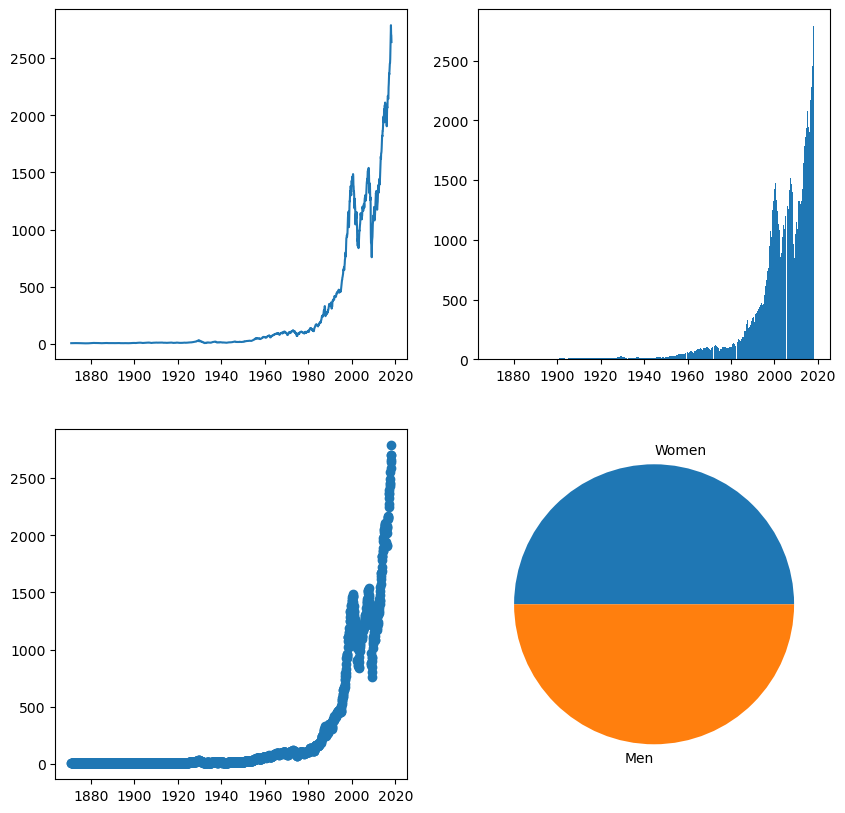

In [29]:
figure,axes =plt.subplots(2 ,2, figsize=(10,10))
axes[0,0].plot(x,y)
axes[1,0].scatter(x,y)
axes[0,1].bar(x,y, width=30)
axes[1,1].pie([30,30], labels=['Women', 'Men'])

In [ ]:
# Seaborn bardziej ciekawe wykresy :) 